In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'
# d parser df:=lambda x: pd.datetime.strptime(x,'gy-8m-gd gI-Sp")
df = pd.read_csv(url, index_col = 'year', parse_dates=True, infer_datetime_format=True)
# df = pd.read_csv(url)
# df['year'] = pd.to_datetime(df['year'], format='%Y%', errors='ignore')
# # Converting the index as date
# df.index = pd.to_datetime(df.index)

# df = df.index.year
# df = df.set_index('year')

# # Converting the index as date
# df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13276 entries, 1985-01-01 to 2015-01-01
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               13276 non-null  object 
 1   sex                   13276 non-null  object 
 2   age                   13276 non-null  object 
 3   suicides              13276 non-null  int64  
 4   population            13276 non-null  int64  
 5   sucid_in_hundredk     13276 non-null  float64
 6   country-year          13276 non-null  object 
 7   yearly_gdp            13276 non-null  float64
 8   gdp_per_capita        13276 non-null  int64  
 9   generation            13276 non-null  object 
 10  suicides.1            13276 non-null  float64
 11  internetusers         13276 non-null  float64
 12  expenses              13276 non-null  float64
 13  employeecompensation  13276 non-null  float64
 14  unemployment          13276 non-null  float64
 15  ph

In [3]:
russia = df[(df.country == 'Russian Federation')]
russia.head()

,country,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,generation,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
year,,,,,,,,,,,,,,,,,,,,,
1989-01-01,Russian Federation,male,75+ years,1393,1349100,103.25,Russian Federation1989,5.065000e+11,3740,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,RUS,0.009469
1989-01-01,Russian Federation,male,35-54 years,12030,18058500,66.62,Russian Federation1989,5.065000e+11,3740,Silent,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,RUS,0.009469
1989-01-01,Russian Federation,male,55-74 years,6250,9383700,66.60,Russian Federation1989,5.065000e+11,3740,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,RUS,0.009469
1989-01-01,Russian Federation,male,25-34 years,6856,12748800,53.78,Russian Federation1989,5.065000e+11,3740,Boomers,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,RUS,0.009469
1989-01-01,Russian Federation,female,75+ years,1677,4738100,35.39,Russian Federation1989,5.065000e+11,3740,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,RUS,0.009469


In [4]:
columns = ['sucid_in_hundredk']
russia = pd.DataFrame(russia, columns=columns)
russia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1989-01-01 to 2015-01-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sucid_in_hundredk  324 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [5]:
# adding all deaths together and group by year
russia = russia.groupby(['year'])['sucid_in_hundredk'].transform('sum')
# russia = russia.reset_index().drop_duplicates()
russia = pd.Series.to_frame(russia)

# russia['year'] = pd.to_datetime(russia['year'], format='%Y00%').apply(lambda x: x.strftime('%Y'))
russia['year'] = list(russia.index)
russia = russia.drop_duplicates()
df = russia.drop(labels='year', axis=1)
df.head(10)

,sucid_in_hundredk
year,
1989-01-01,398.82
1990-01-01,399.17
1991-01-01,396.40
1992-01-01,437.48
1993-01-01,522.06
1994-01-01,567.64
1995-01-01,547.38
1996-01-01,526.28
1997-01-01,508.09


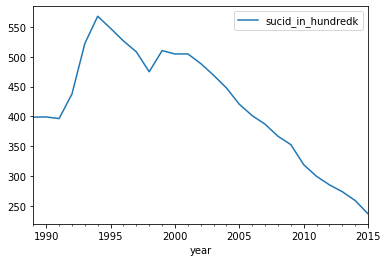

In [6]:
from matplotlib import pyplot
# print(russia.head())
df.plot()
pyplot.show()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Test RMSE: 11.792


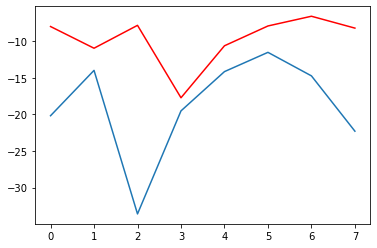

In [16]:
# fit and evaluate an AR model
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

# series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = difference(df.values)
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:]
# train autoregression
window = 1
model = AutoReg(train, lags=1)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [8]:
# fit an AR model and save the whole model to file
# from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(df.values)
# fit model
model = AutoReg(X, lags=6)
model_fit = model.fit()
# save model to file
# model_fit.save('ar_model.pkl')
# save the differenced dataset
# numpy.save('ar_data.npy', X)
# save the last ob
# numpy.save('ar_obs.npy', [df.values[-1]])

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [9]:
# load the AR model from file
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
loaded = AutoRegResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[-1.51354614e+01 -1.19928953e-01  2.07181169e-01 -3.78302289e-03
 -2.19596854e-01  2.20018369e-02  2.91063243e-01]
[[236.92]]


### Finalize and Save Time Series Forecast Model

In [10]:
# fit an AR model and manually save coefficients to file

from statsmodels.tsa.ar_model import AutoReg
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(df.values)
# fit model
window_size = 6
model = AutoReg(X, lags=window_size)
model_fit = model.fit()
# save coefficients
coef = model_fit.params
# numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
# numpy.save('man_data.npy', lag)
# save the last ob
# numpy.save('man_obs.npy', [df.values[-1]])

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [11]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[-1.51354614e+01 -1.19928953e-01  2.07181169e-01 -3.78302289e-03
 -2.19596854e-01  2.20018369e-02  2.91063243e-01]
[[-33.59]
 [-19.53]
 [-14.17]
 [-11.54]
 [-14.75]
 [-22.3 ]]
[[236.92]]


### Make a Time Series Forecast

In [12]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
# load model
model = AutoRegResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 214.351865


### Update Forecast Model

In [13]:
# update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)